In [135]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

In [136]:
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [137]:
# File to Load (Remember to Change These)
mouse_drug_data_to_load = "Pymaceuticals_data_mouse_drug_data.csv"
clinical_trial_data_to_load = "Pymaceuticals_data_clinicaltrial_data.csv"

In [138]:
# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

In [139]:
mouse_drug_data.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [140]:
clinical_trial_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [141]:
clinical_data_complete = pd.merge(mouse_drug_data,clinical_trial_data, how="left", on=["Mouse ID"])
clinical_data_complete["Mean Tumor Volume(mm3)"] = clinical_data_complete["Tumor Volume (mm3)"].mean()
clinical_data_complete.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites,Mean Tumor Volume(mm3)
0,f234,Stelasyn,0,45.000000,0,50.46812
1,f234,Stelasyn,5,47.313491,0,50.46812
2,f234,Stelasyn,10,47.904324,0,50.46812
3,f234,Stelasyn,15,48.735197,1,50.46812
4,f234,Stelasyn,20,51.112713,2,50.46812


In [142]:
 # Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
drug_data = clinical_data_complete[["Drug","Timepoint","Tumor Volume (mm3)"]]

In [143]:
drug_data_group  = drug_data.groupby(["Drug","Timepoint"])
drug_data_group.mean()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
...                                 ...
Zoniferol 25                  55.432935
          30                  57.713531
          35                  60.089372
          40                  62.916692
          45                  65.960888

[100 rows x 1 columns]

In [144]:
 # Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
for volumen in clinical_data_complete:
    standar_error_tumar = drug_data_group.sem()
    
# Convert to DataFrame
# Preview DataFrame    
standar_error_tumar.head(20)
#type(standar_error_tumar

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731
          25                   0.881642
          30                   0.934460
          35                   1.052241
          40                   1.223608
          45                   1.223977
Ceftamin  0                    0.000000
          5                    0.164505
          10                   0.236144
          15                   0.332053
          20                   0.359482
          25                   0.439356
          30                   0.490620
          35                   0.692248
          40                   0.708505
          45                   0.902358

In [145]:
# Minor Data Munging to Re-Format the Data Frames
drug_data_reformat = drug_data.pivot_table("Tumor Volume (mm3)", ["Timepoint"], "Drug")
drug_data_reformat

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [146]:
#Create a dataframe by each treatment:
#Capomulin:
Capomulin_tumor_volume=clinical_data_complete.loc[clinical_data_complete["Drug"]=="Capomulin"]
Capomulin_tumor_volume = Capomulin_tumor_volume[["Drug","Timepoint","Tumor Volume (mm3)"]]
Capomulin_tumor_volume_reformat = Capomulin_tumor_volume.pivot_table("Tumor Volume (mm3)", ["Timepoint"], "Drug")
Capomulin_tumor_volume_reformat["Mean"] = Capomulin_tumor_volume_reformat.mean(axis=1)

#Ceftamin
Ceftamin_tumor_volume=clinical_data_complete.loc[clinical_data_complete["Drug"]=="Ceftamin"]
Ceftamin_tumor_volume = Ceftamin_tumor_volume[["Drug","Timepoint","Tumor Volume (mm3)"]]
Ceftamin_tumor_volume_reformat = Ceftamin_tumor_volume.pivot_table("Tumor Volume (mm3)", ["Timepoint"], "Drug")
Ceftamin_tumor_volume_reformat["Mean"] = Ceftamin_tumor_volume_reformat.mean(axis=1)

#Infubinol
Infubinol_tumor_volume=clinical_data_complete.loc[clinical_data_complete["Drug"]=="Infubinol"]
Infubinol_tumor_volume = Infubinol_tumor_volume[["Drug","Timepoint","Tumor Volume (mm3)"]]
Infubinol_tumor_volume_reformat = Infubinol_tumor_volume.pivot_table("Tumor Volume (mm3)", ["Timepoint"], "Drug")
Infubinol_tumor_volume_reformat["Mean"] = Infubinol_tumor_volume_reformat.mean(axis=1)

#Ketapril
Ketapril_tumor_volume=clinical_data_complete.loc[clinical_data_complete["Drug"]=="Ketapril"]
Ketapril_tumor_volume = Ketapril_tumor_volume[["Drug","Timepoint","Tumor Volume (mm3)"]]
Ketapril_tumor_volume_reformat = Ketapril_tumor_volume.pivot_table("Tumor Volume (mm3)", ["Timepoint"], "Drug")
Ketapril_tumor_volume_reformat["Mean"] = Ketapril_tumor_volume_reformat.mean(axis=1)

#Naftisol
Naftisol_tumor_volume=clinical_data_complete.loc[clinical_data_complete["Drug"]=="Naftisol"]
Naftisol_tumor_volume = Naftisol_tumor_volume[["Drug","Timepoint","Tumor Volume (mm3)"]]
Naftisol_tumor_volume_reformat = Naftisol_tumor_volume.pivot_table("Tumor Volume (mm3)", ["Timepoint"], "Drug")
Naftisol_tumor_volume_reformat["Mean"] = Naftisol_tumor_volume_reformat.mean(axis=1)

#Placebo
Placebo_tumor_volume=clinical_data_complete.loc[clinical_data_complete["Drug"]=="Placebo"]
Placebo_tumor_volume = Placebo_tumor_volume[["Drug","Timepoint","Tumor Volume (mm3)"]]
Placebo_tumor_volume_reformat = Placebo_tumor_volume.pivot_table("Tumor Volume (mm3)", ["Timepoint"], "Drug")
Placebo_tumor_volume_reformat["Mean"] = Placebo_tumor_volume_reformat.mean(axis=1)

#Propriva
Propriva_tumor_volume=clinical_data_complete.loc[clinical_data_complete["Drug"]=="Propriva"]
Propriva_tumor_volume = Propriva_tumor_volume[["Drug","Timepoint","Tumor Volume (mm3)"]]
Propriva_tumor_volume_reformat = Propriva_tumor_volume.pivot_table("Tumor Volume (mm3)", ["Timepoint"], "Drug")
Propriva_tumor_volume_reformat["Mean"] = Propriva_tumor_volume_reformat.mean(axis=1)

#Ramicane
Ramicane_tumor_volume=clinical_data_complete.loc[clinical_data_complete["Drug"]=="Ramicane"]
Ramicane_tumor_volume = Ramicane_tumor_volume[["Drug","Timepoint","Tumor Volume (mm3)"]]
Ramicane_tumor_volume_reformat = Ramicane_tumor_volume.pivot_table("Tumor Volume (mm3)", ["Timepoint"], "Drug")
Ramicane_tumor_volume_reformat["Mean"] = Ramicane_tumor_volume_reformat.mean(axis=1)

#stelasyn
stelasyn_tumor_volume=clinical_data_complete.loc[clinical_data_complete["Drug"]=="Stelasyn"]
stelasyn_tumor_volume = stelasyn_tumor_volume[["Drug","Timepoint","Tumor Volume (mm3)"]]
stelasyn_tumor_volume_reformat = stelasyn_tumor_volume.pivot_table("Tumor Volume (mm3)", ["Timepoint"], "Drug")
stelasyn_tumor_volume_reformat["Mean"] = stelasyn_tumor_volume_reformat.mean(axis=1)

#Zoniferol
Zoniferol_tumor_volume=clinical_data_complete.loc[clinical_data_complete["Drug"]=="Zoniferol"]
Zoniferol_tumor_volume = Zoniferol_tumor_volume[["Drug","Timepoint","Tumor Volume (mm3)"]]
Zoniferol_tumor_volume_reformat = Zoniferol_tumor_volume.pivot_table("Tumor Volume (mm3)", ["Timepoint"], "Drug")
Zoniferol_tumor_volume_reformat["Mean"] = Zoniferol_tumor_volume_reformat.mean(axis=1)

In [147]:
# Create a bunch of samples, each with sample size of 5
nsamples = 10
div = 5
samples_Capomulin = [Capomulin_tumor_volume_reformat.sample(div) for x in range(0,nsamples)]
samples_Ceftamin = [Ceftamin_tumor_volume_reformat.sample(div) for x in range(0,nsamples)]
samples_Infubinol = [Infubinol_tumor_volume_reformat.sample(div) for x in range(0,nsamples)]
samples_Ketapril = [Ketapril_tumor_volume_reformat.sample(div) for x in range(0,nsamples)]
samples_Naftisol = [Naftisol_tumor_volume_reformat.sample(div) for x in range(0,nsamples)]
samples_Placebo = [Placebo_tumor_volume_reformat.sample(div) for x in range(0,nsamples)]
samples_Propriva = [Propriva_tumor_volume_reformat.sample(div) for x in range(0,nsamples)]
samples_Ramicane = [Ramicane_tumor_volume_reformat.sample(div) for x in range(0,nsamples)]
samples_stelasyn = [stelasyn_tumor_volume_reformat.sample(div) for x in range(0,nsamples)]
samples_Zoniferol = [Zoniferol_tumor_volume_reformat.sample(div) for x in range(0,nsamples)]

In [148]:
 # Calculate means
means_Capomulin = [s.Mean.mean() for s in samples_Capomulin]
means_Ceftamin = [s.Mean.mean() for s in samples_Ceftamin]
means_Infubinol = [s.Mean.mean() for s in samples_Infubinol]
means_Ketapril = [s.Mean.mean() for s in samples_Ketapril]
means_Naftisol = [s.Mean.mean() for s in samples_Naftisol]
means_Placebo = [s.Mean.mean() for s in samples_Placebo]
means_Propriva = [s.Mean.mean() for s in samples_Propriva]
means_Ramicane = [s.Mean.mean() for s in samples_Ramicane]
means_stelasyn = [s.Mean.mean() for s in samples_stelasyn]
means_Zoniferol = [s.Mean.mean() for s in samples_Zoniferol]

# Calculate standard error on means
sems_Capomulin = [sem(s.Mean) for s in samples_Capomulin]
sems_Ceftamin = [sem(s.Mean) for s in samples_Ceftamin]
sems_Infubinol = [sem(s.Mean) for s in samples_Infubinol]
sems_Ketapril = [sem(s.Mean) for s in samples_Ketapril]
sems_Naftisol = [sem(s.Mean) for s in samples_Naftisol]
sems_Placebo = [sem(s.Mean) for s in samples_Placebo]
sems_Propriva = [sem(s.Mean) for s in samples_Propriva]
sems_Ramicane = [sem(s.Mean) for s in samples_Ramicane]
sems_stelasyn = [sem(s.Mean) for s in samples_stelasyn]
sems_Zoniferol = [sem(s.Mean) for s in samples_Zoniferol]

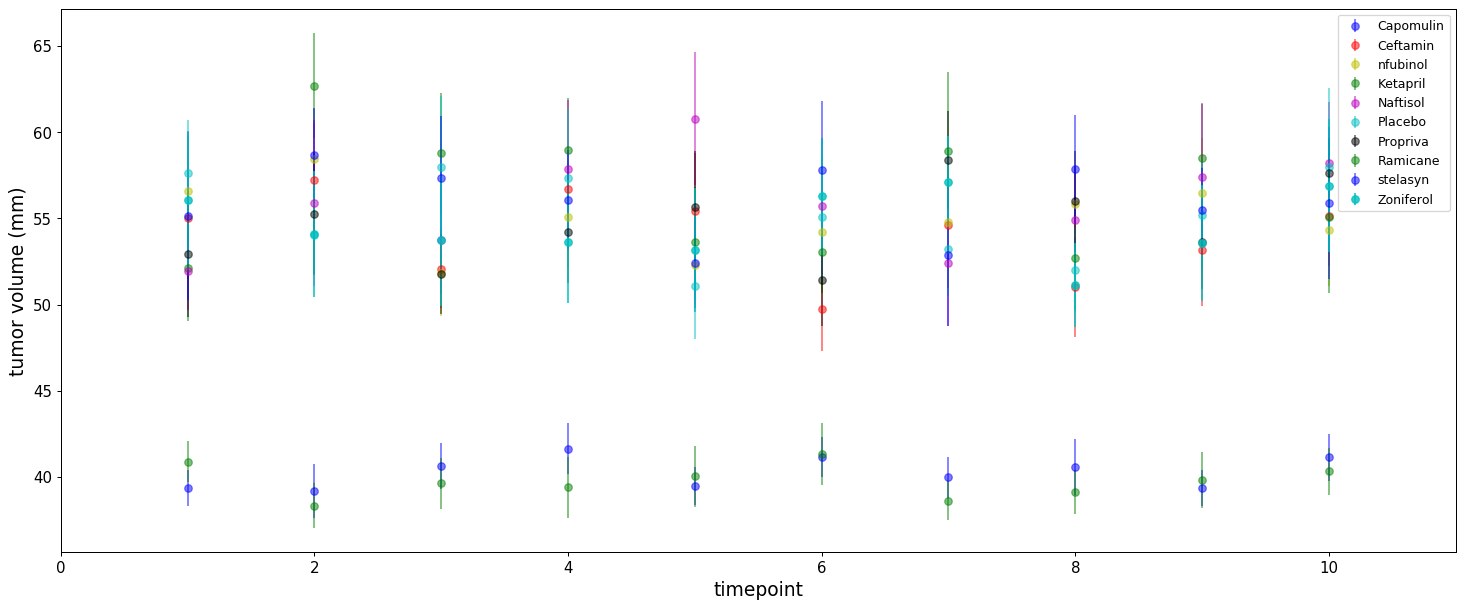

In [149]:
# Plot sample means with error bars
fig, ax = plt.subplots(figsize=(20, 8), dpi=90)

ax.errorbar(np.arange(0, len(samples_Capomulin), 1)+1,means_Capomulin, yerr=sems_Capomulin, fmt="o", color="b",
            alpha=0.5, label="Capomulin")
ax.set_xlim(0, len(means_Capomulin)+1)

ax.errorbar(np.arange(0, len(samples_Ceftamin), 1)+1,means_Ceftamin, yerr=sems_Ceftamin, fmt="o", color="r",
            alpha=0.5, label="Ceftamin")
ax.set_xlim(0, len(means_Ceftamin)+1)

ax.errorbar(np.arange(0, len(samples_Infubinol), 1)+1,means_Infubinol, yerr=sems_Infubinol, fmt="o", color="y",
            alpha=0.5, label="nfubinol")
ax.set_xlim(0, len(means_Infubinol)+1)

ax.errorbar(np.arange(0, len(samples_Ketapril), 1)+1,means_Ketapril, yerr=sems_Ketapril, fmt="o", color="g",
            alpha=0.5, label="Ketapril")
ax.set_xlim(0, len(means_Ketapril)+1)

ax.errorbar(np.arange(0, len(samples_Naftisol), 1)+1,means_Naftisol, yerr=sems_Naftisol, fmt="o", color="m",
            alpha=0.5, label="Naftisol")
ax.set_xlim(0, len(means_Naftisol)+1)

ax.errorbar(np.arange(0, len(samples_Placebo), 1)+1,means_Placebo, yerr=sems_Placebo, fmt="o", color="c",
            alpha=0.5, label="Placebo")
ax.set_xlim(0, len(means_Placebo)+1)

ax.errorbar(np.arange(0, len(samples_Propriva), 1)+1,means_Propriva, yerr=sems_Propriva, fmt="o", color="k",
            alpha=0.5, label="Propriva")
ax.set_xlim(0, len(means_Propriva)+1)

ax.errorbar(np.arange(0, len(samples_Ramicane), 1)+1,means_Ramicane, yerr=sems_Ramicane, fmt="o", color="g",
            alpha=0.5, label="Ramicane")
ax.set_xlim(0, len(means_Ramicane)+1)

ax.errorbar(np.arange(0, len(samples_stelasyn), 1)+1,means_stelasyn, yerr=sems_stelasyn, fmt="o", color="b",
            alpha=0.5, label="stelasyn")
ax.set_xlim(0, len(means_stelasyn)+1)

ax.errorbar(np.arange(0, len(samples_Zoniferol), 1)+1,means_Zoniferol, yerr=sems_Zoniferol, fmt="o", color="c",
            alpha=0.8, label="Zoniferol")
ax.set_xlim(0, len(means_Zoniferol)+1)


plt.xticks(fontsize=12 )
plt.yticks(fontsize=12 )
ax.set_xlabel("timepoint",fontsize=15)
ax.set_ylabel("tumor volume (mm)",fontsize=15)
plt.legend(loc="best", fontsize="medium", fancybox=True)


                 
plt.show()



In [150]:
#Creating a scatter plot that shows how the number of metastatic (cancer spreading) sites changes over time for each treatment.

In [151]:
 # Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
metastatic_data = clinical_data_complete[["Drug","Timepoint","Metastatic Sites"]]

metastatic_data_reformat = metastatic_data.pivot_table(index="Timepoint", columns="Drug",values="Metastatic Sites")
metastatic_data_reformat

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [152]:
#Create a dataframe by each treatment:
#Capomulin:
Capomulin_Metastatic=clinical_data_complete.loc[clinical_data_complete["Drug"]=="Capomulin"]
Capomulin_Metastatic= Capomulin_Metastatic[["Drug","Timepoint","Metastatic Sites"]]
Capomulin_Metastatic_reformat = Capomulin_Metastatic.pivot_table("Metastatic Sites", ["Timepoint"], "Drug")
Capomulin_Metastatic_reformat["Mean"] = Capomulin_Metastatic_reformat.mean(axis=1)

#Ceftamin
Ceftamin_Metastatic=clinical_data_complete.loc[clinical_data_complete["Drug"]=="Ceftamin"]
Ceftamin_Metastatic = Ceftamin_Metastatic[["Drug","Timepoint","Metastatic Sites"]]
Ceftamin_Metastatic_reformat = Ceftamin_Metastatic.pivot_table("Metastatic Sites", ["Timepoint"], "Drug")
Ceftamin_Metastatic_reformat["Mean"] = Ceftamin_Metastatic_reformat.mean(axis=1)

#Infubinol
Infubinol_Metastatic=clinical_data_complete.loc[clinical_data_complete["Drug"]=="Infubinol"]
Infubinol_Metastatic= Infubinol_Metastatic[["Drug","Timepoint","Metastatic Sites"]]
Infubinol_Metastatic_reformat = Infubinol_Metastatic.pivot_table("Metastatic Sites", ["Timepoint"], "Drug")
Infubinol_Metastatic_reformat["Mean"] = Infubinol_Metastatic_reformat.mean(axis=1)

#Ketapril
Ketapril_Metastatic=clinical_data_complete.loc[clinical_data_complete["Drug"]=="Ketapril"]
Ketapril_Metastatic = Ketapril_Metastatic[["Drug","Timepoint","Metastatic Sites"]]
Ketapril_Metastatic_reformat = Ketapril_Metastatic.pivot_table("Metastatic Sites", ["Timepoint"], "Drug")
Ketapril_Metastatic_reformat["Mean"] = Ketapril_Metastatic_reformat.mean(axis=1)

#Naftisol
Naftisol_Metastatic=clinical_data_complete.loc[clinical_data_complete["Drug"]=="Naftisol"]
Naftisol_Metastatic = Naftisol_Metastatic[["Drug","Timepoint","Metastatic Sites"]]
Naftisol_Metastatic_reformat = Naftisol_Metastatic.pivot_table("Metastatic Sites", ["Timepoint"], "Drug")
Naftisol_Metastatic_reformat["Mean"] = Naftisol_Metastatic_reformat.mean(axis=1)

#Placebo
Placebo_Metastatic=clinical_data_complete.loc[clinical_data_complete["Drug"]=="Placebo"]
Placebo_Metastatic = Placebo_Metastatic[["Drug","Timepoint","Metastatic Sites"]]
Placebo_Metastatic_reformat = Placebo_Metastatic.pivot_table("Metastatic Sites", ["Timepoint"], "Drug")
Placebo_Metastatic_reformat["Mean"] = Placebo_Metastatic_reformat.mean(axis=1)

#Propriva
Propriva_Metastatic=clinical_data_complete.loc[clinical_data_complete["Drug"]=="Propriva"]
Propriva_Metastatic = Propriva_Metastatic[["Drug","Timepoint","Metastatic Sites"]]
Propriva_Metastatic_reformat = Propriva_Metastatic.pivot_table("Metastatic Sites", ["Timepoint"], "Drug")
Propriva_Metastatic_reformat["Mean"] = Propriva_Metastatic_reformat.mean(axis=1)

#Ramicane
Ramicane_Metastatic=clinical_data_complete.loc[clinical_data_complete["Drug"]=="Ramicane"]
Ramicane_Metastatic = Ramicane_Metastatic[["Drug","Timepoint","Metastatic Sites"]]
Ramicane_Metastatic_reformat = Ramicane_Metastatic.pivot_table("Metastatic Sites", ["Timepoint"], "Drug")
Ramicane_Metastatic_reformat["Mean"] = Ramicane_Metastatic_reformat.mean(axis=1)

#stelasyn
stelasyn_Metastatic=clinical_data_complete.loc[clinical_data_complete["Drug"]=="Stelasyn"]
stelasyn_Metastatic = stelasyn_Metastatic[["Drug","Timepoint","Metastatic Sites"]]
stelasyn_Metastatic_reformat = stelasyn_Metastatic.pivot_table("Metastatic Sites", ["Timepoint"], "Drug")
stelasyn_Metastatic_reformat["Mean"] = stelasyn_Metastatic_reformat.mean(axis=1)

#Zoniferol
Zoniferol_Metastatic=clinical_data_complete.loc[clinical_data_complete["Drug"]=="Zoniferol"]
Zoniferol_Metastatic = Zoniferol_Metastatic[["Drug","Timepoint","Metastatic Sites"]]
Zoniferol_Metastatic_reformat = Zoniferol_Metastatic.pivot_table("Metastatic Sites", ["Timepoint"], "Drug")
Zoniferol_Metastatic_reformat["Mean"] = Zoniferol_Metastatic_reformat.mean(axis=1)

In [153]:
# Create a bunch of samples, each with sample size of 5
nsamples = 10
div = 5
samples_Capomulin_meta = [Capomulin_Metastatic_reformat.sample(div) for x in range(0,nsamples)]
samples_Ceftamin_meta  = [Ceftamin_Metastatic_reformat.sample(div) for x in range(0,nsamples)]
samples_Infubinol_meta  = [Infubinol_Metastatic_reformat.sample(div) for x in range(0,nsamples)]
samples_Ketapril_meta  = [Ketapril_Metastatic_reformat.sample(div) for x in range(0,nsamples)]
samples_Naftisol_meta  = [Naftisol_Metastatic_reformat.sample(div) for x in range(0,nsamples)]
samples_Placebo_meta  = [Placebo_Metastatic_reformat.sample(div) for x in range(0,nsamples)]
samples_Propriva_meta  = [Propriva_Metastatic_reformat.sample(div) for x in range(0,nsamples)]
samples_Ramicane_meta  = [Ramicane_Metastatic_reformat.sample(div) for x in range(0,nsamples)]
samples_stelasyn_meta  = [stelasyn_Metastatic_reformat.sample(div) for x in range(0,nsamples)]
samples_Zoniferol_meta  = [Zoniferol_Metastatic_reformat.sample(div) for x in range(0,nsamples)]

In [154]:
 # Calculate means
means_Capomulin_meta = [s.Mean.mean() for s in samples_Capomulin_meta ]
means_Ceftamin_meta  = [s.Mean.mean() for s in samples_Ceftamin_meta ]
means_Infubinol_meta  = [s.Mean.mean() for s in samples_Infubinol_meta ]
means_Ketapril_meta = [s.Mean.mean() for s in samples_Ketapril_meta ]
means_Naftisol_meta  = [s.Mean.mean() for s in samples_Naftisol_meta ]
means_Placebo_meta  = [s.Mean.mean() for s in samples_Placebo_meta ]
means_Propriva_meta  = [s.Mean.mean() for s in samples_Propriva_meta ]
means_Ramicane_meta  = [s.Mean.mean() for s in samples_Ramicane_meta ]
means_stelasyn_meta  = [s.Mean.mean() for s in samples_stelasyn_meta ]
means_Zoniferol_meta  = [s.Mean.mean() for s in samples_Zoniferol_meta ]

# Calculate standard error on means
sems_Capomulin_meta  = [sem(s.Mean) for s in samples_Capomulin_meta ]
sems_Ceftamin_meta  = [sem(s.Mean) for s in samples_Ceftamin_meta ]
sems_Infubinol_meta = [sem(s.Mean) for s in samples_Infubinol_meta ]
sems_Ketapril_meta  = [sem(s.Mean) for s in samples_Ketapril_meta ]
sems_Naftisol_meta  = [sem(s.Mean) for s in samples_Naftisol_meta ]
sems_Placebo_meta  = [sem(s.Mean) for s in samples_Placebo_meta ]
sems_Propriva_meta  = [sem(s.Mean) for s in samples_Propriva_meta ]
sems_Ramicane_meta  = [sem(s.Mean) for s in samples_Ramicane_meta ]
sems_stelasyn_meta  = [sem(s.Mean) for s in samples_stelasyn_meta ]
sems_Zoniferol_meta  = [sem(s.Mean) for s in samples_Zoniferol_meta]

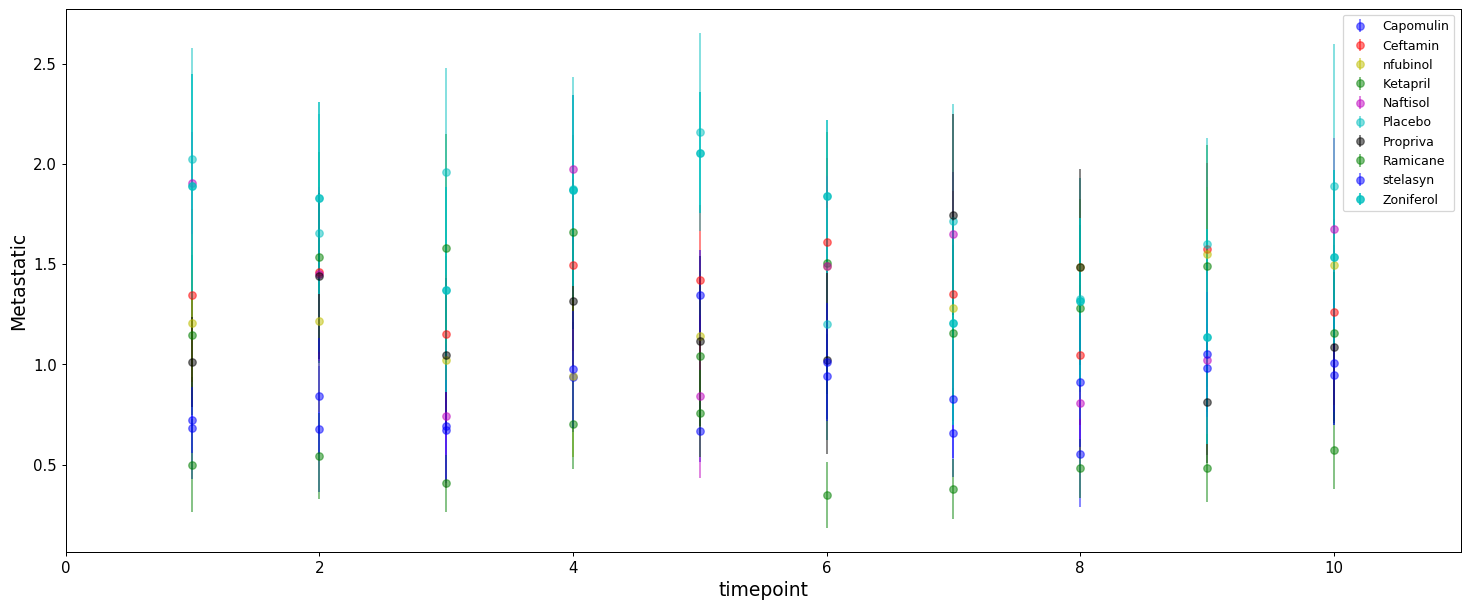

In [155]:
# Plot sample means with error bars
fig, ax = plt.subplots(figsize=(20, 8), dpi=90)

ax.errorbar(np.arange(0, len(samples_Capomulin_meta), 1)+1,means_Capomulin_meta, yerr=sems_Capomulin_meta, fmt="o", color="b",
            alpha=0.5, label="Capomulin")
ax.set_xlim(0, len(means_Capomulin_meta)+1)

ax.errorbar(np.arange(0, len(samples_Ceftamin_meta), 1)+1,means_Ceftamin_meta, yerr=sems_Ceftamin_meta, fmt="o", color="r",
            alpha=0.5, label="Ceftamin")
ax.set_xlim(0, len(means_Ceftamin_meta)+1)

ax.errorbar(np.arange(0, len(samples_Infubinol_meta), 1)+1,means_Infubinol_meta, yerr=sems_Infubinol_meta, fmt="o", color="y",
            alpha=0.5, label="nfubinol")
ax.set_xlim(0, len(means_Infubinol_meta)+1)

ax.errorbar(np.arange(0, len(samples_Ketapril_meta), 1)+1,means_Ketapril_meta, yerr=sems_Ketapril_meta, fmt="o", color="g",
            alpha=0.5, label="Ketapril")
ax.set_xlim(0, len(means_Ketapril_meta)+1)

ax.errorbar(np.arange(0, len(samples_Naftisol_meta), 1)+1,means_Naftisol_meta, yerr=sems_Naftisol_meta, fmt="o", color="m",
            alpha=0.5, label="Naftisol")
ax.set_xlim(0, len(means_Naftisol_meta)+1)

ax.errorbar(np.arange(0, len(samples_Placebo_meta), 1)+1,means_Placebo_meta, yerr=sems_Placebo_meta, fmt="o", color="c",
            alpha=0.5, label="Placebo")
ax.set_xlim(0, len(means_Placebo_meta)+1)

ax.errorbar(np.arange(0, len(samples_Propriva_meta), 1)+1,means_Propriva_meta, yerr=sems_Propriva_meta, fmt="o", color="k",
            alpha=0.5, label="Propriva")
ax.set_xlim(0, len(means_Propriva_meta)+1)

ax.errorbar(np.arange(0, len(samples_Ramicane_meta), 1)+1,means_Ramicane_meta, yerr=sems_Ramicane_meta, fmt="o", color="g",
            alpha=0.5, label="Ramicane")
ax.set_xlim(0, len(means_Ramicane_meta)+1)

ax.errorbar(np.arange(0, len(samples_stelasyn_meta), 1)+1,means_stelasyn_meta, yerr=sems_stelasyn_meta, fmt="o", color="b",
            alpha=0.5, label="stelasyn")
ax.set_xlim(0, len(means_stelasyn_meta)+1)

ax.errorbar(np.arange(0, len(samples_Zoniferol_meta), 1)+1,means_Zoniferol_meta, yerr=sems_Zoniferol_meta, fmt="o", color="c",
            alpha=0.8, label="Zoniferol")
ax.set_xlim(0, len(means_Zoniferol_meta)+1)


plt.xticks(fontsize=12 )
plt.yticks(fontsize=12 )
ax.set_xlabel("timepoint",fontsize=15)
ax.set_ylabel("Metastatic",fontsize=15)
plt.legend(loc="best", fontsize="medium", fancybox=True)


                 
plt.show()

In [156]:
#Capomulin_survive=mouse_survive_df.loc[clinical_data_complete["Drug"]=="Capomulin"]
#Capomulin_survive["Mouse Count"]=clinical_data_complete["Mouse ID"].count()
#Capomulin_survive_reformat = Capomulin_survive.pivot_table("Mouse Count", ["Timepoint"], "
#Capomulin_survive_reformat["Mean"] = clinical_data_complete["Mouse ID"].count()
#mouse_survive_group = Capomulin_survive.groupby(["Drug","Timepoint"])
#mouse_survive_group
 #                                   Capomulin_survive_reformat

In [157]:
percentage_tumor_vol_change = clinical_data_complete[["Drug","Timepoint","Tumor Volume (mm3)"]]
percentage_tumor_vol_change["% tumor volumen change"] = (percentage_tumor_vol_change["Tumor Volume (mm3)"]/percentage_tumor_vol_change["Tumor Volume (mm3)"].sum())*100
percentage_tumor_vol_change = percentage_tumor_vol_change[["Drug","% tumor volumen change"]]
percentage_tumor_vol_change_gruop = percentage_tumor_vol_change.groupby("Drug")
percentage_tumor_vol_change_gruop.sum()

percentage_tumor_vol_change_gruop.sum()




,% tumor volumen change
Drug,
Capomulin,9.725754
Ceftamin,9.731792
Infubinol,9.799660
Ketapril,10.795362
Naftisol,10.505703
Placebo,10.167222
Propriva,8.757392
Ramicane,9.532389
Stelasyn,10.912142


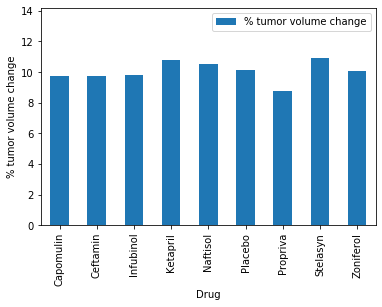

In [170]:
#fig, ax = plt.subplots()

Drug = ["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propriva","Stelasyn","Zoniferol"]
tumor_volumen_change = [9.725754,9.731792,9.799660,10.795362,10.505703,10.167222,8.757392,10.912142,10.072584]

Vol_change_data =pd.DataFrame({"Drug":Drug,
                              "% tumor volume change":tumor_volumen_change})

#Vol_change_data_df = pd.DataFrame(Vol_change_df)

ax = Vol_change_data.plot.bar("Drug", "% tumor volume change")


ax.set_xlabel("Drug")
ax.set_ylabel("% tumor volume change")
ax.margins(x=0, y=0.3)

plt.show()


